In [146]:
import math 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [147]:
data=pd.read_csv("TSLA.csv")

In [148]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


The target value to be predict is going to be the "Close" stock price value

In [149]:
training_set=data.iloc[:800,1:2].values
test_set=data.iloc[800:,1:2].values

In [150]:
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [151]:
x_train=[]
y_train=[]
for i in range(60,800):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)
'''
We have now reshape the data into the following format(value,time-steps,1 dimentional output)
'''
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

# Build Model
We'll build the LSTM with 50 neurons and 4 hiden layers.Finally, we will assign 1 neuron in the output layer for predicting the normalized stock price.We use the MSE loss function and Adam stochastic gradient optimizer

In [152]:
model=Sequential()

model.add(LSTM(units=50,return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [153]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [154]:
y_train.shape
x_train.shape

(740, 60, 1)

In [155]:
model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
24/24 [==============================] - 1s 54ms/step - loss: 0.0574
Epoch 2/100
24/24 [==============================] - 1s 54ms/step - loss: 0.0153
Epoch 3/100
24/24 [==============================] - 1s 54ms/step - loss: 0.0123
Epoch 4/100
24/24 [==============================] - 1s 54ms/step - loss: 0.0155
Epoch 5/100
24/24 [==============================] - 1s 53ms/step - loss: 0.0144
Epoch 6/100
24/24 [==============================] - 1s 55ms/step - loss: 0.0132
Epoch 7/100
24/24 [==============================] - 1s 54ms/step - loss: 0.0108
Epoch 8/100
24/24 [==============================] - 1s 54ms/step - loss: 0.0105
Epoch 9/100
24/24 [==============================] - 1s 54ms/step - loss: 0.0116
Epoch 10/100
24/24 [==============================] - 1s 54ms/step - loss: 0.0110
Epoch 11/100
24/24 [==============================] - 1s 53ms/step - loss: 0.0111
Epoch 12/100
24/24 [==============================] - 1s 53ms/step - loss: 0.0093
Epoch 13/100
24/24 [=====

In [156]:
dataset_train=data.iloc[:800,1:2]
dataset_test=data.iloc[800:,1:2]

In [157]:
dataset_total=pd.concat((dataset_train,dataset_test),axis=0)

In [158]:
inputs=dataset_total[len(dataset_total)-len(dataset_test) -60:].values

In [159]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 519):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)

(459, 60, 1)


# Predict the stock price for data test

In [160]:
#range(0,1)
predict_stock_price=model.predict(X_test)
predict_stock_price.shape

(459, 1)

In [161]:
#undo the scaling of data according to feature_reage
predict_stock_price=sc.inverse_transform(np.reshape(predict_stock_price,(predict_stock_price.shape[0],predict_stock_price.shape[1])))

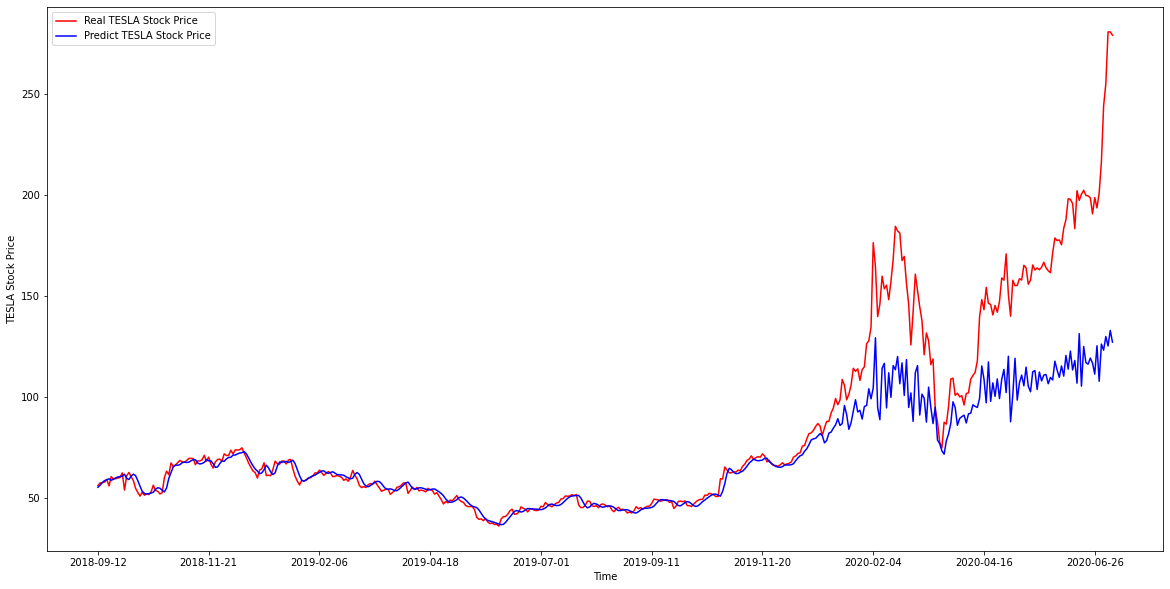

In [177]:
plt.figure(figsize=(20,10))
plt.plot(data.iloc[800:,0],dataset_test.values,color='red',label='Real TESLA Stock Price')
plt.plot(data.iloc[800:,0],predict_stock_price,color='blue',label='Predict TESLA Stock Price')
#function is used to for get and set the current tick location and label of the x-axis
plt.xticks(np.arange(0,459,50))
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.savefig('image.jpg')
plt.show()